In [36]:
import tensorflow as tlf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [37]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [38]:
len(X_train)

60000

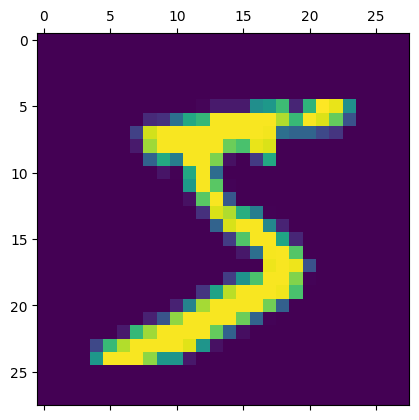

In [39]:
plt.matshow(X_train[0])

In [40]:
y_train[0] #the real value of the image

np.uint8(5)

In [41]:
X_train = X_train / 255
X_test = X_test / 255

Flatten the data set , So each Image(value) can be accede with one index 

In [42]:
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_test_flattend = X_test.reshape(len(X_test),28*28)

X_train_flattend.shape

(60000, 784)

In [43]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8074 - loss: 0.7285
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - accuracy: 0.9142 - loss: 0.3097
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.9190 - loss: 0.2909
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.9248 - loss: 0.2722
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step - accuracy: 0.9265 - loss: 0.2655


In [44]:
model.evaluate(X_test_flattend,y_test) #the output will be : test_loss, test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.9147 - loss: 0.3031


[0.2676301896572113, 0.9258000254631042]

In [45]:
y_predicted = model.predict(X_test_flattend)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step


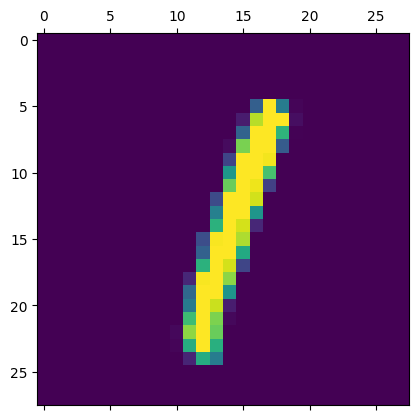

In [46]:
plt.matshow(X_test[5])

In [47]:
y_predicted[5]
np.argmax(y_predicted[5]) # will find the max value and print it, the max is the final score and the predicted one

np.int64(1)

In [48]:
y_predicted[5]

array([7.6955643e-05, 9.9809998e-01, 4.9053195e-01, 3.6105126e-01,
       5.9672254e-03, 1.9269815e-02, 1.0767135e-02, 4.9284890e-01,
       4.8874924e-01, 1.2274995e-01], dtype=float32)

In [49]:
y_predicted_labeled = [np.argmax(i) for i in y_predicted]
y_predicted_labeled[:6]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1)]

In [50]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Visualize the results using heat map by plotting the confusion matrix


In [51]:
confusion_mat = tlf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labeled)
confusion_mat[:5]

<tf.Tensor: shape=(5, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   4,    9,  933,   14,    7,    3,   11,   10,   39,    2],
       [   3,    0,   25,  905,    0,   33,    2,   12,   25,    5],
       [   1,    1,    7,    1,  916,    0,   11,    4,   12,   29]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'true')

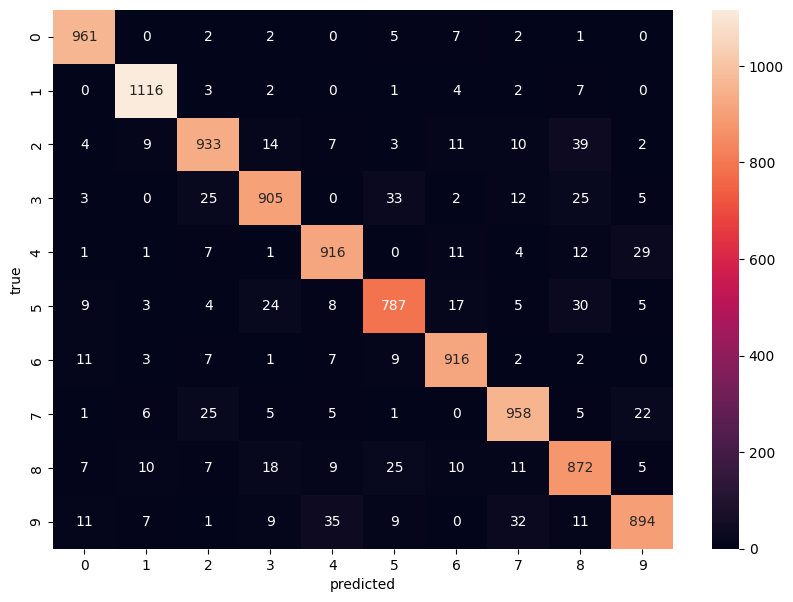

In [52]:
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(confusion_mat,annot = True, fmt = "d")
plt.xlabel("predicted")
plt.ylabel("true")

USING HIDDEN LAYERS


In [64]:
model = keras.Sequential([
    keras.layers.Dense(150,input_shape=(784,),activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid") 
])
model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8798 - loss: 0.4075
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.9684 - loss: 0.1031
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.9793 - loss: 0.0654
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9845 - loss: 0.0481
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.9868 - loss: 0.0407


In [63]:
model.evaluate(X_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.9747 - loss: 0.0956


[0.07744026929140091, 0.978600025177002]

Flatten the matrix from 2d to 1d directly in the neeural network

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(150,input_shape=(784,),activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid") 
])
model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train,y_train,epochs=5)

/Users/youneschiad/.pyenv/versions/3.12.3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/youneschiad/.pyenv/versions/3.12.3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.8723 - loss: 0.4328
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - accuracy: 0.9683 - loss: 0.1053
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.9785 - loss: 0.0694
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9851 - loss: 0.0484
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.9871 - loss: 0.0407
